# EXAM WEEK 8

In [60]:
# Importing Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Read Dataset EastWestAirlines.csv
data = pd.read_csv('EastWestAirlines.csv')

In [62]:
data.shape

(3999, 12)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award              3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [64]:
data

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


## Cleansing Data

In [65]:
data.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award                0
dtype: int64

In [66]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

## K - Means Clustering

c:\Users\Revanza Zakly\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Revanza Zakly\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Revanza Zakly\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Revanza Zakly\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Revanza Zakly\a

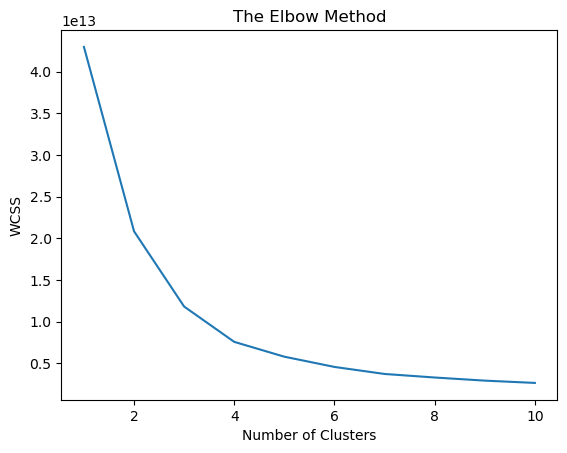

In [67]:
# Mencari Elbow methode untuk mendapatkan cluster yang paling optimal
from sklearn.cluster import KMeans
wcss = []

for i in range (1,11):
    kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

#Plot Grafik
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [68]:
# training KMeans model base on dataset
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(data)

c:\Users\Revanza Zakly\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [69]:
# Menampilkan 25 data
y_kmeans[:25]

array([1, 1, 1, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 0])

In [70]:
# Menampilkan nilai unique dari data
np.unique(y_kmeans)

array([0, 1, 2, 3])

In [71]:
y_kmeans.shape

(3999,)

## New Data set with K-Means Clustering

In [72]:
df_kmeans = data
df_kmeans

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [73]:
#Menambahkan ClusterID ke dalam dataframe
df_kmeans['ClusterID'] = y_kmeans

In [74]:
#Mengurutkan ClusterID
df_kmeans.sort_values("ClusterID")

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID
1163,1175,210040,0,5,1,1,77333,39,0,0,5517,0,0
2720,2742,174743,0,1,1,1,27460,12,0,0,2326,0,0
3421,3444,139982,0,1,1,1,14500,6,0,0,1430,0,0
3419,3442,97391,0,1,1,1,26299,8,0,0,1607,0,0
868,879,206648,0,1,1,1,5132,16,2450,11,6030,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,477,743745,2066,1,1,1,4100,20,2500,18,8228,1,3
43,44,619393,0,3,1,1,15008,14,0,0,7819,1,3
510,516,889456,1024,5,1,1,98959,29,850,4,6652,1,3
2489,2508,704113,0,5,1,1,98119,23,0,0,3082,1,3


## Algomerative HC

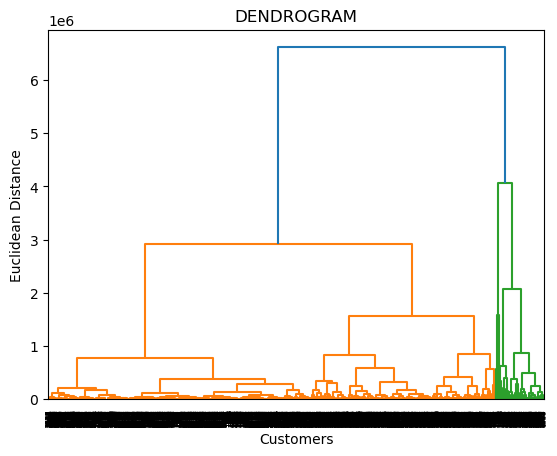

In [75]:
# Mencari Cluster yang paling optimal
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(data,method='ward'))
plt.title('DENDROGRAM')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

In [76]:
from sklearn .cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(data)

c:\Users\Revanza Zakly\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [77]:
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
y_hc.shape

(3999,)

In [79]:
np.unique(y_hc)

array([0, 1, 2], dtype=int64)

# Data Frame Algomerative HC

In [83]:
df_Algomerative = data
df_Algomerative

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [81]:
# Memasukan ClusterID ke dalan data Frame y_hc
df_Algomerative['ClusterID'] = y_hc

In [82]:
# Mengurutkan ClusterID
df_Algomerative.sort_values("ClusterID")

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
2644,2664,29150,0,3,1,1,13952,14,0,0,2544,1,0
2645,2665,37529,0,4,1,1,25706,14,0,0,2558,1,0
2646,2666,7515,0,2,1,1,13681,18,0,0,2552,1,0
2648,2668,24265,0,1,1,1,1854,12,0,0,2550,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,472,1113394,2015,5,1,1,60883,26,2600,9,8228,1,2
117,120,969559,0,1,1,1,2500,3,1000,2,7718,1,2
1188,1200,837979,0,1,1,1,18372,15,1450,4,5373,1,2
510,516,889456,1024,5,1,1,98959,29,850,4,6652,1,2
